In [1]:
depp<-c("Seurat",'ggplot2')
sapply(depp, library, character.only = TRUE)

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”


$Seurat
[1] "SeuratObject" "Seurat"       "stats"        "graphics"     "grDevices"   
[6] "utils"        "datasets"     "methods"      "base"        

$ggplot2
 [1] "ggplot2"      "SeuratObject" "Seurat"       "stats"        "graphics"    
 [6] "grDevices"    "utils"        "datasets"     "methods"      "base"

In [1]:
library(Seurat)


Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject



ERROR: Error in eval(expr, envir, enclos): object 'Feat' not found


In [3]:
scRNA.integrated=readRDS('../01-Subcluster/subtype.harmony.rds')

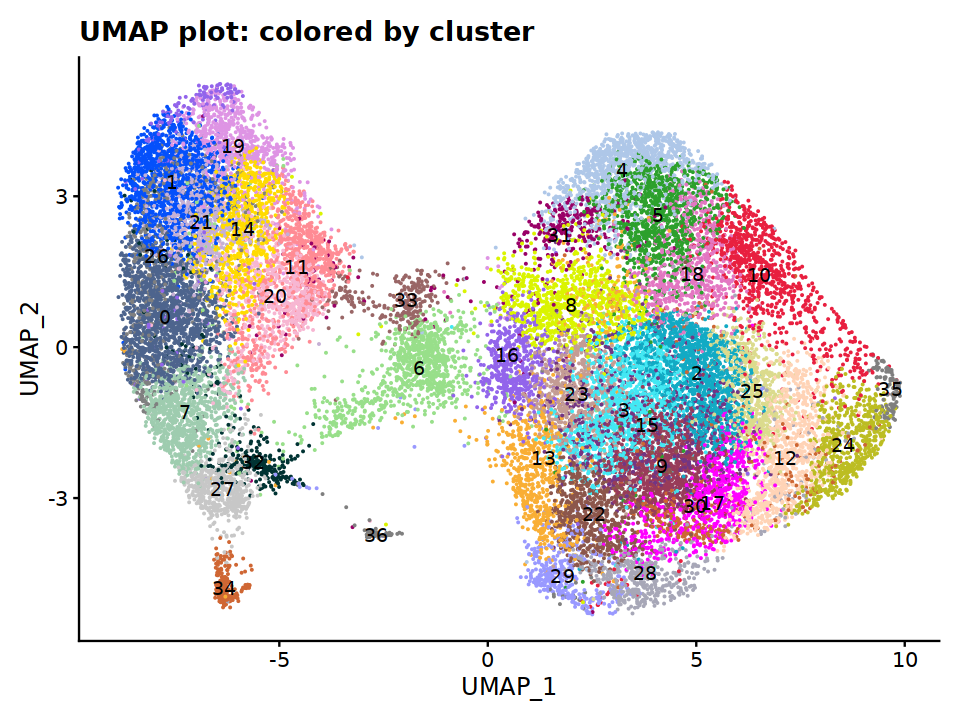

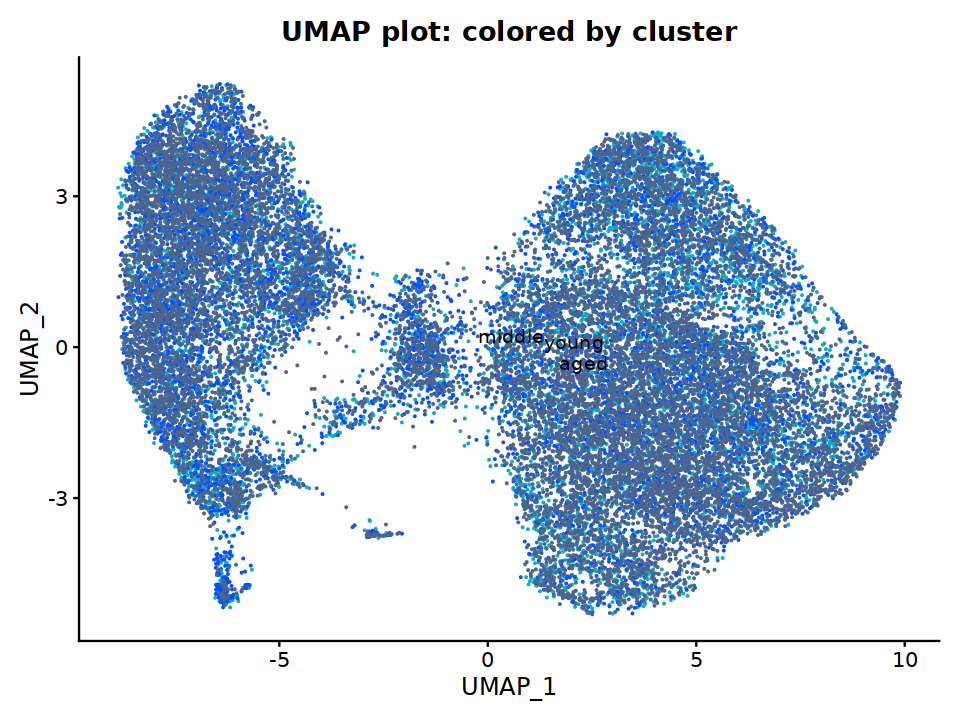

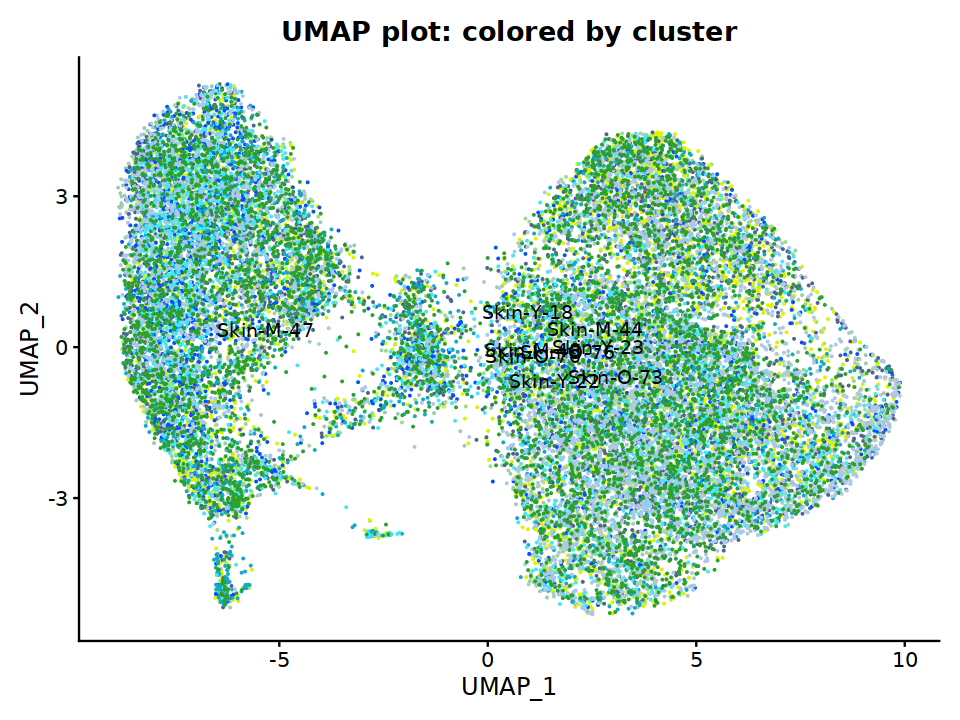

In [5]:
options(repr.plot.width=8, repr.plot.height=6)
colors<-c("#4d648d", "#0450fb", "#11aac4", "#42e8f3", "#AEC7E8", "#2CA02C", "#98DF8A", "#9eccaf", "#daf400", "#983b59", "#e81f3f", "#ff8b94", "#ffd3b6", "#f9ae34", "#ffdb00", "#723584", "#9264eb", "#ff00ff", "#E377C2", "#de94e4", "#F7B6D2", "#C5B0D5", "#8C564B", "#C49C94", "#BCBD22", "#DBDB8D", "#7F7F7F", "#C7C7C7", "#a7a7b7", "#9999FF",  "#CC6633", "#990066", "#003333", "#996666","#CF6633")
DimPlot(scRNA.integrated, reduction = "umap", label = TRUE, repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")
DimPlot(scRNA.integrated, reduction = "umap",group.by = 'group', label = TRUE, repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")
DimPlot(scRNA.integrated, reduction = "umap",group.by = 'sample', label = TRUE, repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")

In [6]:
tt=list(
    c('IL11RA1','BARX2','MSX2'),# OB/IB/supra OB
    c('KRT6A','KRT75'), #inner bulge kc,IB
    c('CD34','POSTN','LGR5'),  #outer bulge kc,OB  HFSC
    c('SCD1',"MGST1","PPARG","PRDM1","IGFBP2",'PPARY'), #  15                     #SG
    c('KRT79','KRT17','CD44','CD200','LRIG1'), #HF  Cd34?
    c("SPRR1A","DEFB6","CST6","ALOXL2E"), # "Krt79", 6    # SubBasalHF
    
    c('DSC1','KRT2','IVL','TGM3','FLG'), # GC   granular cell
    c('KRT10','KRT1','DSG1','CDH1'),      # SC  spinous cell   also expressed in GC
    c('KRT14','KRT5','CDH3','TP63','KRT15'),   #BC     basal cell   
    c('TYR','DCT',"PMEL",'TYRP1',"MLANA",'MITF'), #ME  melanocyte
    c('CD86','CD207'), ##LC  langerhans
    c("S100B",'NGFR',"CDH19","PLP1"),  #Schwann cell SW
    c('PDGFRA',"LUM","DCN","VIM","COL1A2"),  # FB  fibroblast
    c('MKI67'),  # MC          mitotic cell
    c('SOX9','KRT6B','SFRP1',"VHF"), #VHF  vellus hair follicle cell
    c("CLDN5","PECAM1","CD74",'VWF','SELE','FLT4','LYVE1'), #  EC  endothelial cell
    c('CD3D','LKZF2','CCL5','CD8A'), # T cell
    c('CCL19','CD14','CD163'), ## MA  macrophage ,'CD200'
    c('KIT','HPGD','TPSB2'), # mast cell
    c("PTPRC",'AIF1','LYZ','HLA-DRA','CD68','ITGAX','FCER1A','CD3G','CD3E','LCK'), # IC immune cell ;
                                        #AIF1, LYZ, HLA-DRA, CD68/ FCER1A,ITGAX--macrophage/dendritic cells; 
                                        #CD3D, CD3G, CD3E, and LCK--T cell
    c('RGS5','PDGFRB',"ACTA2")  ##  PT  pericyte
    
    )    
names(tt)=c('OB/IB/supra OB','IB','OB','SG','HF','SubasalHF','GC',"SC",'BC','ME','LC','SW','FB','MC','VHF','EC','T cell','MA',
            'Mast','IC','PT')

In [7]:
tt=list(
    c('DSC1','KRT2','IVL','TGM3','FLG'), # GC   granular cell
    c('KRT10','KRT1','DSG1','CDH1'),      # SC  spinous cell   also expressed in GC
    c('KRT14','KRT5','CDH3','TP63'),   #BC     basal cell   
    c('KRT15','ITGB1') ##  Epsc  epidermal stem cell  'KRT5',
    )    
names(tt)=c('GC',"SC",'BC','KC')

Warning message:
“The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


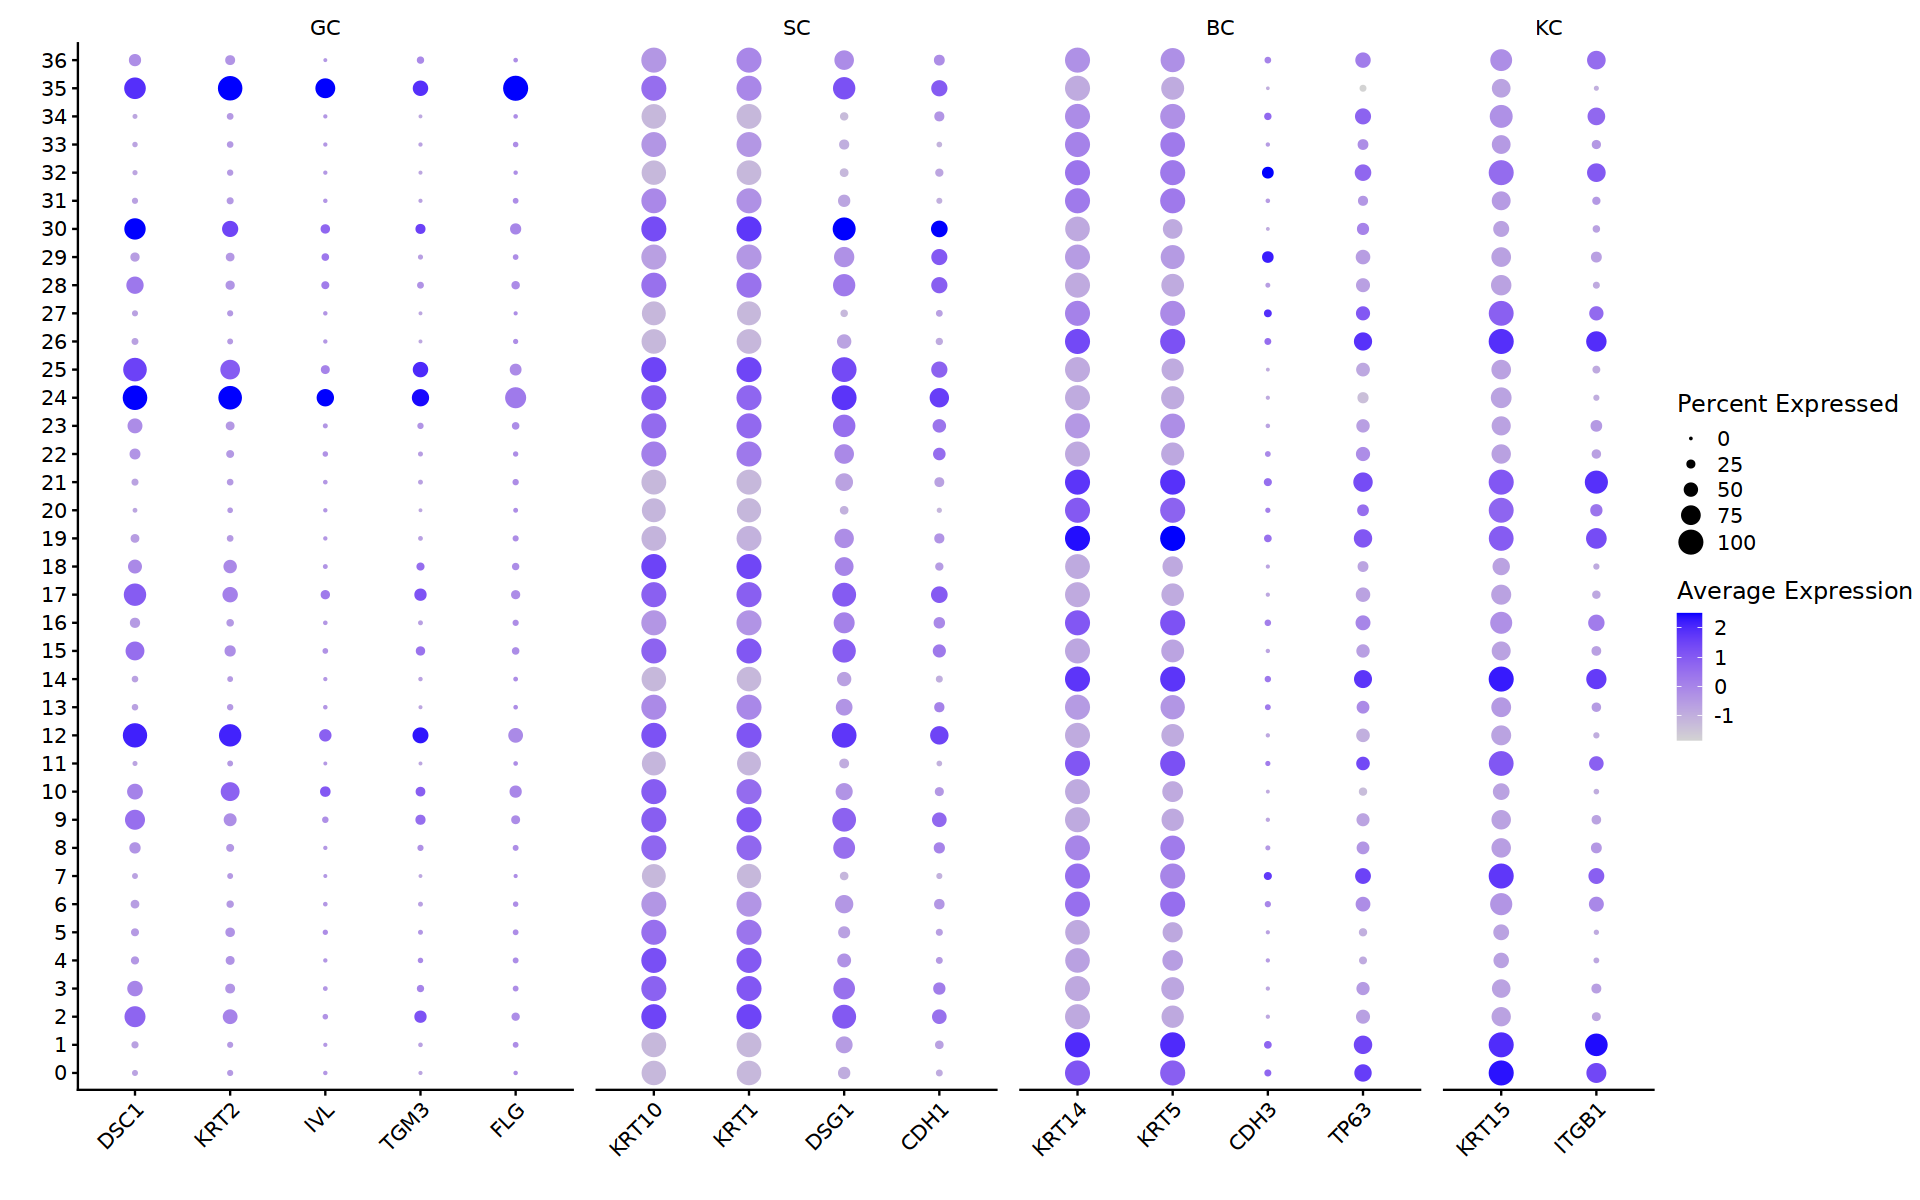

In [8]:
options(repr.plot.width=16, repr.plot.height=10)
DotPlot(scRNA.integrated, features = tt, group.by = "seurat_clusters")+RotatedAxis()+
  scale_x_discrete("")+scale_y_discrete("") #+
#theme(legend.position = 'right',axis.title = element_blank(),legend.text=element_blank(),axis.text = element_blank(),
#      axis.text.x = element_blank(),legend.title=element_blank(),legend.key.height=unit(2,"line"))+scale_size(range=c(0, 9))
ggsave(filename = "marker.png",device = "png",width = 64,height = 33,units = "cm")
#DimPlot(object = scRNA.integrated, reduction = "umap", label = TRUE, repel = TRUE, split.by = "group2")
# 16,15,14,13 ,12,11 ,10 ,9? ,8 ,7? ,6,5,4?, 3, 2, 1, 0.

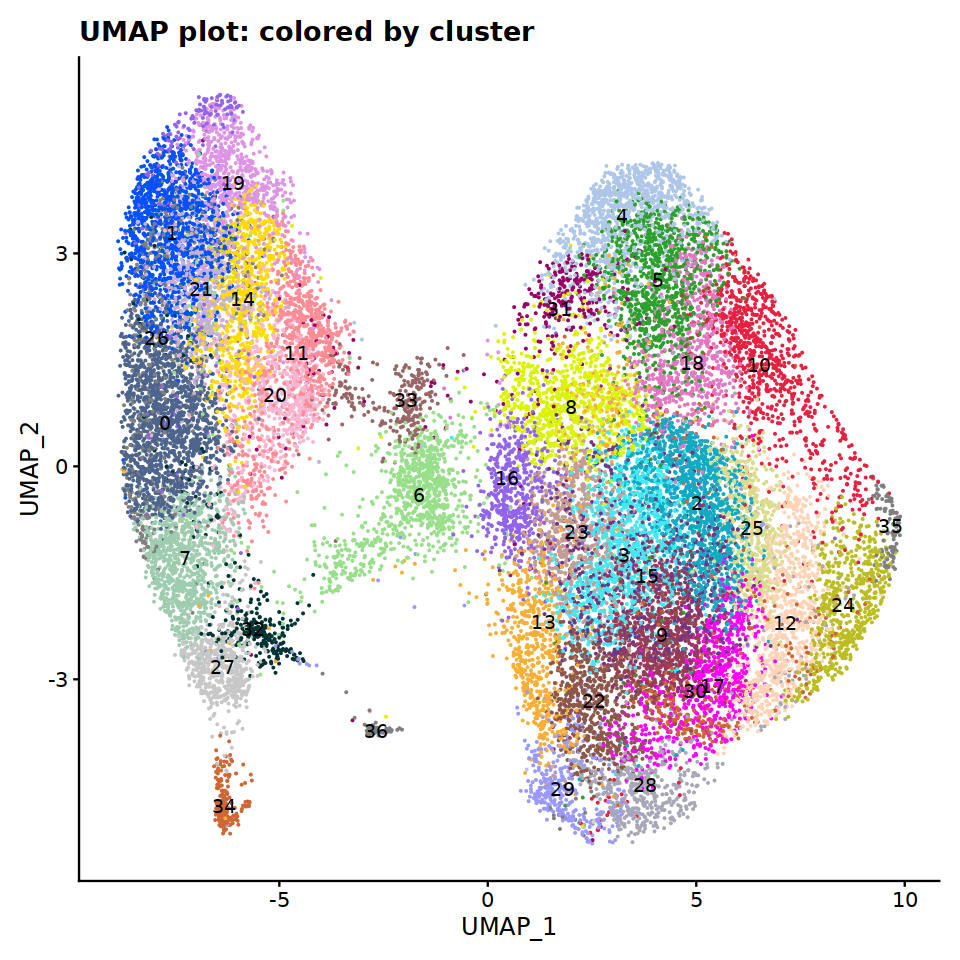

In [9]:
options(repr.plot.width=8, repr.plot.height=8)

DimPlot(scRNA.integrated, reduction = "umap", label = TRUE, repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")

In [10]:
## Assigning cell type identity to clusters
#6,12
#```{r cellType_annotation, message=FALSE,warning=FALSE, echo=FALSE, results='hide', fig.height=6, fig.width=12}
#new.cluster.ids<-c("0: Cycling Epithelial Cells", "1: Surface Ectoderm Cells", "2: Posterior Placodal Ectoderm",  "3: Cycling Epithelial Cells",  "4: Surface Ectoderm Cells", "5: Anterior Placode Ectoderm",  "6: Posterior Placode Ectoderm", "7: Surface Ectoderm Cells", "8: Neuroectoderm", "9: CNCC Mesenchyme", "10: Surface Ectoderm Cells", "11: Cycling Epithelial Cells", "12: Surface Ectoderm Cells", "13: CNCC Mesenchyme", "14: Surface Ectoderm", "15: Cycling Epithelial Cells", "16: Surface Ectoderm Cells", "17: CNCCs", "18: Posterior Placodal Ectoderm", "19: Cycling Neuroectoderm", "20: Low Mito Cells", "21: Neuroectoderm", "22: Neuroblasts", "23: Neuroblasts")
new.cluster.ids<-c('0:BC','1:BC','2:SC','3:SC','4:SC','5:SC','6:SC_BC',
                   '7:BC','8:SC_BC','9:SC','10:SC','11:BC','12:GC_SC','13:SC_BC',
                   '14:BC','15:SC','16:SC_BC','17:SC','18:SC','19:BC','20:BC','21:BC','22:SC','23:SC_BC','24:GC_SC',
                   '25:SC','26:BC','27:BC','28:SC','29:SC_BC','30:SC','31:SC_BC','32:BC','33:SC_BC',
                   '34:BC','35:GC_SC','36:SC_BC'
                  )

scRNA.temp<-scRNA.integrated
names(new.cluster.ids) <- levels(scRNA.temp)
scRNA.temp <- RenameIdents(scRNA.temp, new.cluster.ids)
scRNA.temp[['celltype']]=Idents(scRNA.temp)
#DimPlot(scRNA.temp, reduction = "umap", label = TRUE, cols=colors[1:length(unique(scRNA.temp@active.ident))])
#ggsave(filename = "cell_type.png",device = "png",width = 34,height = 28,units = "cm")


In [11]:
scRNA.integrated=AddModuleScore(scRNA.integrated,features = list(tt[[1]]),name=names(tt)[1])
scRNA.integrated=AddModuleScore(scRNA.integrated,features = list(tt[[2]]),name=names(tt)[2])
scRNA.integrated=AddModuleScore(scRNA.integrated,features = list(tt[[3]]),name=names(tt)[3])
head(scRNA.integrated,2)

orig.ident nCount_RNA nFeature_RNA sample   
Skin-Y-18_AAACCTGCACAGTCGC-18 Skin-Y-18  10128      3125         Skin-Y-18
Skin-Y-18_AAACCTGGTCTCAACA-18 Skin-Y-18   4145      1426         Skin-Y-18
                              group group2 percent.mito integrated_snn_res.1.8
Skin-Y-18_AAACCTGCACAGTCGC-18 young 18     0.07099131   0                     
Skin-Y-18_AAACCTGGTCTCAACA-18 young 18     0.14282268   9                     
                              seurat_clusters integrated_snn_res.1.6
Skin-Y-18_AAACCTGCACAGTCGC-18 2               2                     
Skin-Y-18_AAACCTGGTCTCAACA-18 4               14                    
                              integrated_snn_res.1.5 integrated_snn_res.1.9
Skin-Y-18_AAACCTGCACAGTCGC-18 0                      3                     
Skin-Y-18_AAACCTGGTCTCAACA-18 11                     10                    
                              celltype celltype2 celltype3 RNA_snn_res.2.8
Skin-Y-18_AAACCTGCACAGTCGC-18 3:SC     SC        KC        2              
Skin-Y-18_AAACCTGGTCTCAACA-18 10:SC    SC        KC        4              
                              GC1         SC1      BC1       
Skin-Y-18_AAACCTGCACAGTCGC-18 -0.04911731 2.192695 -0.4098248
Skin-Y-18_AAACCTGGTCTCAACA-18 -0.24075157 1.622463  0.6968192

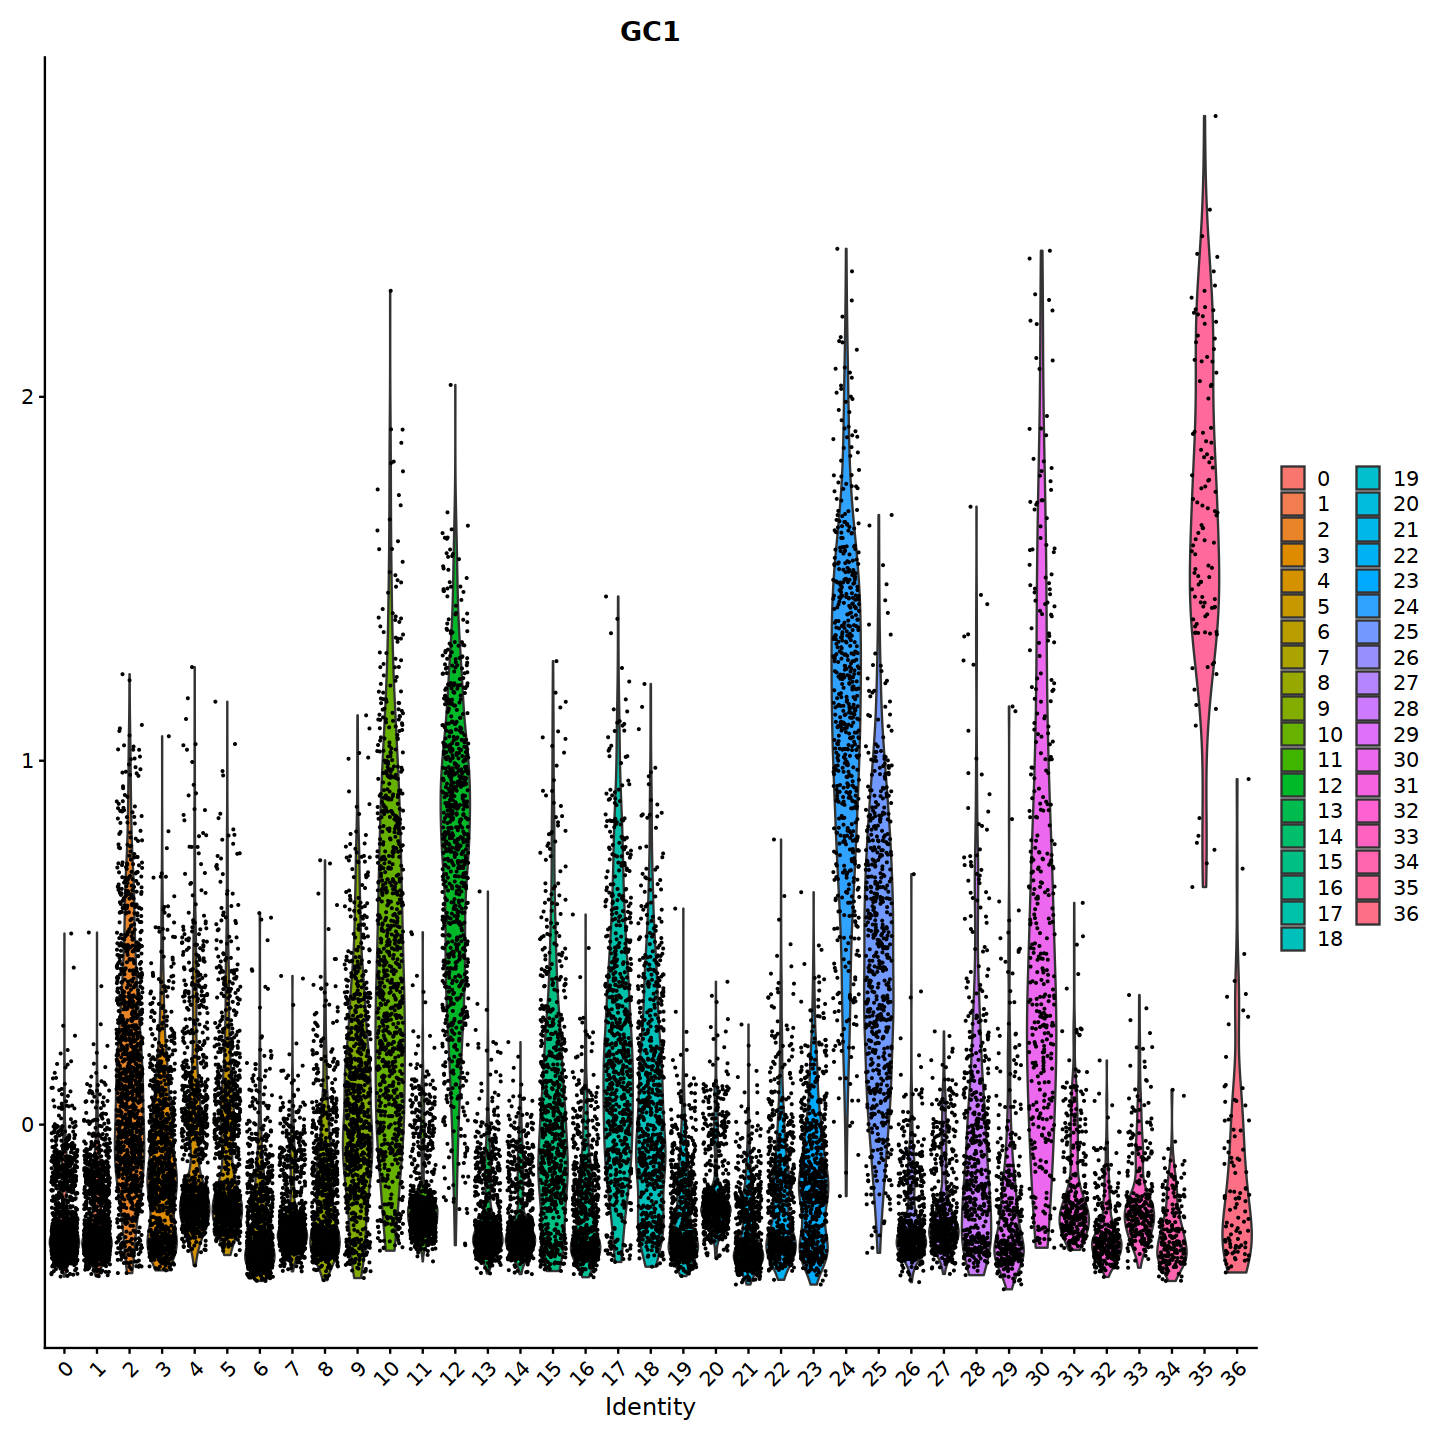

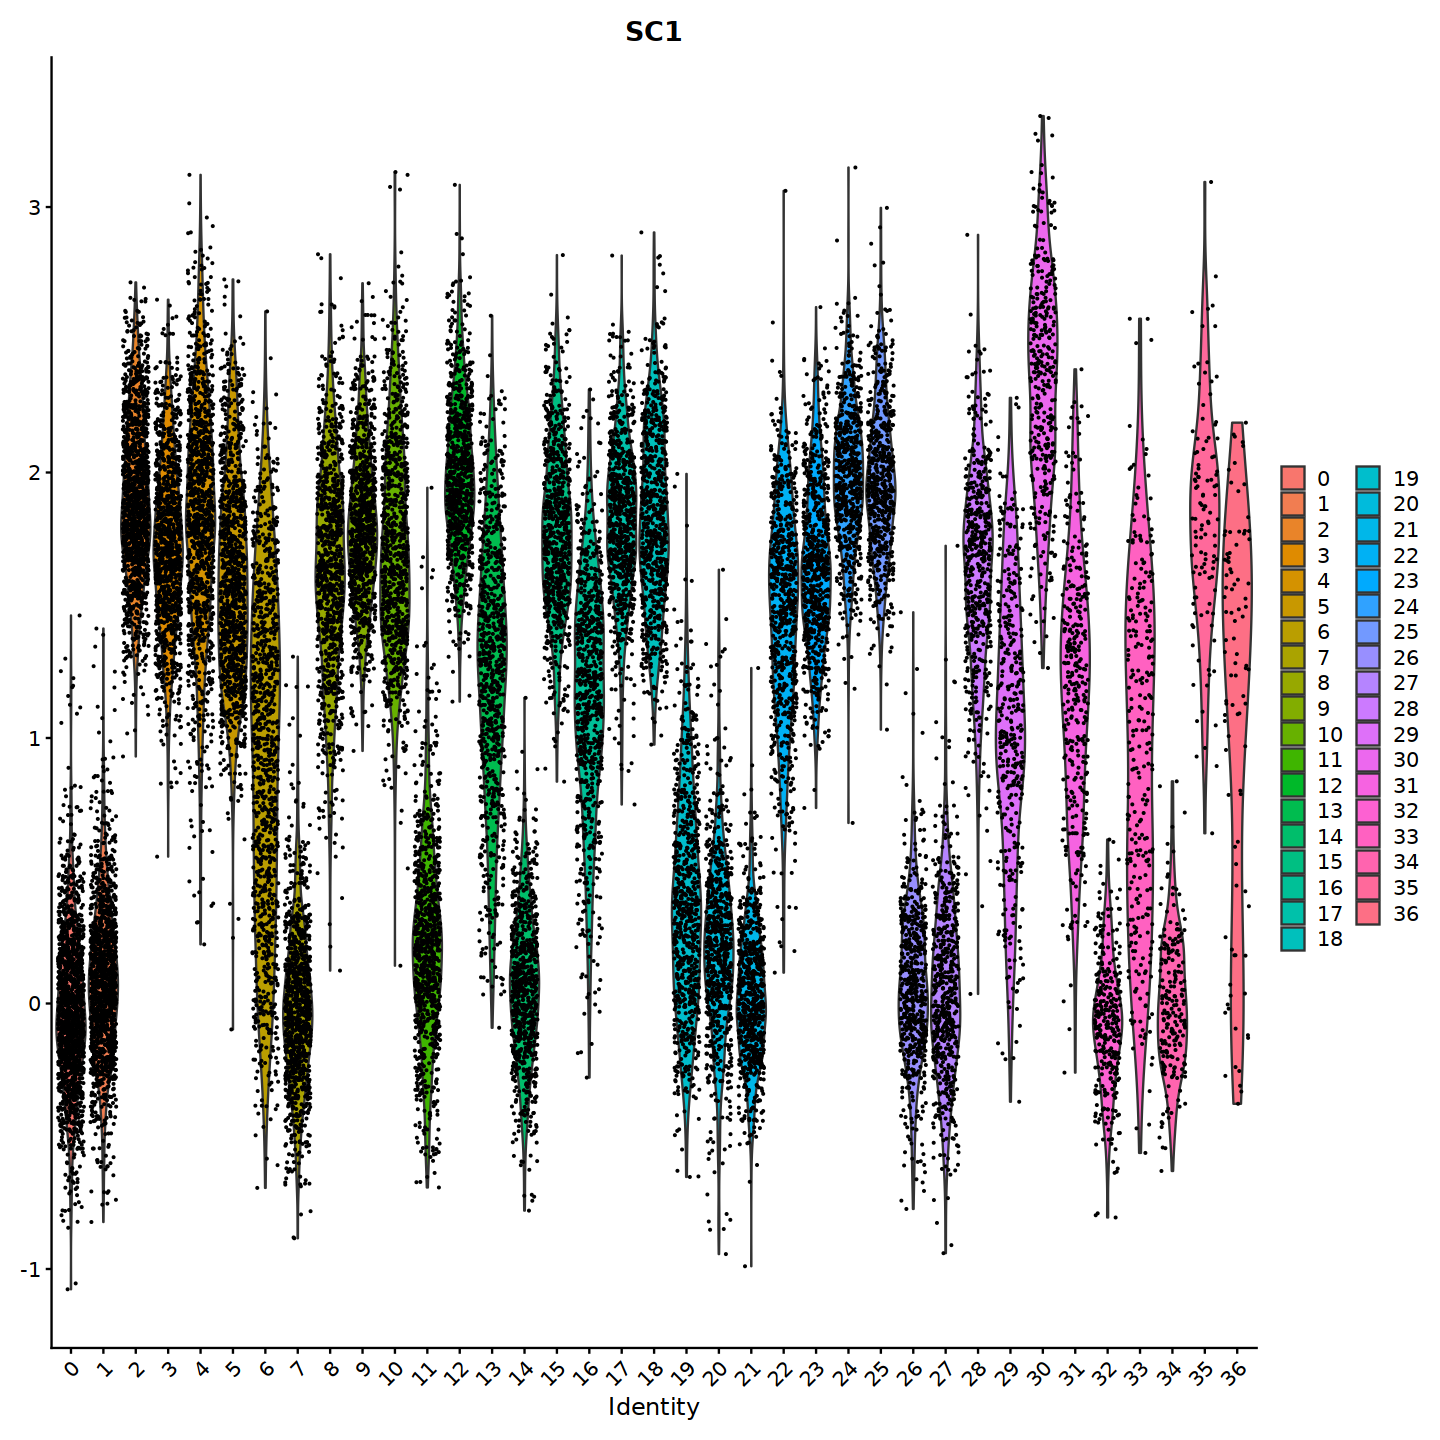

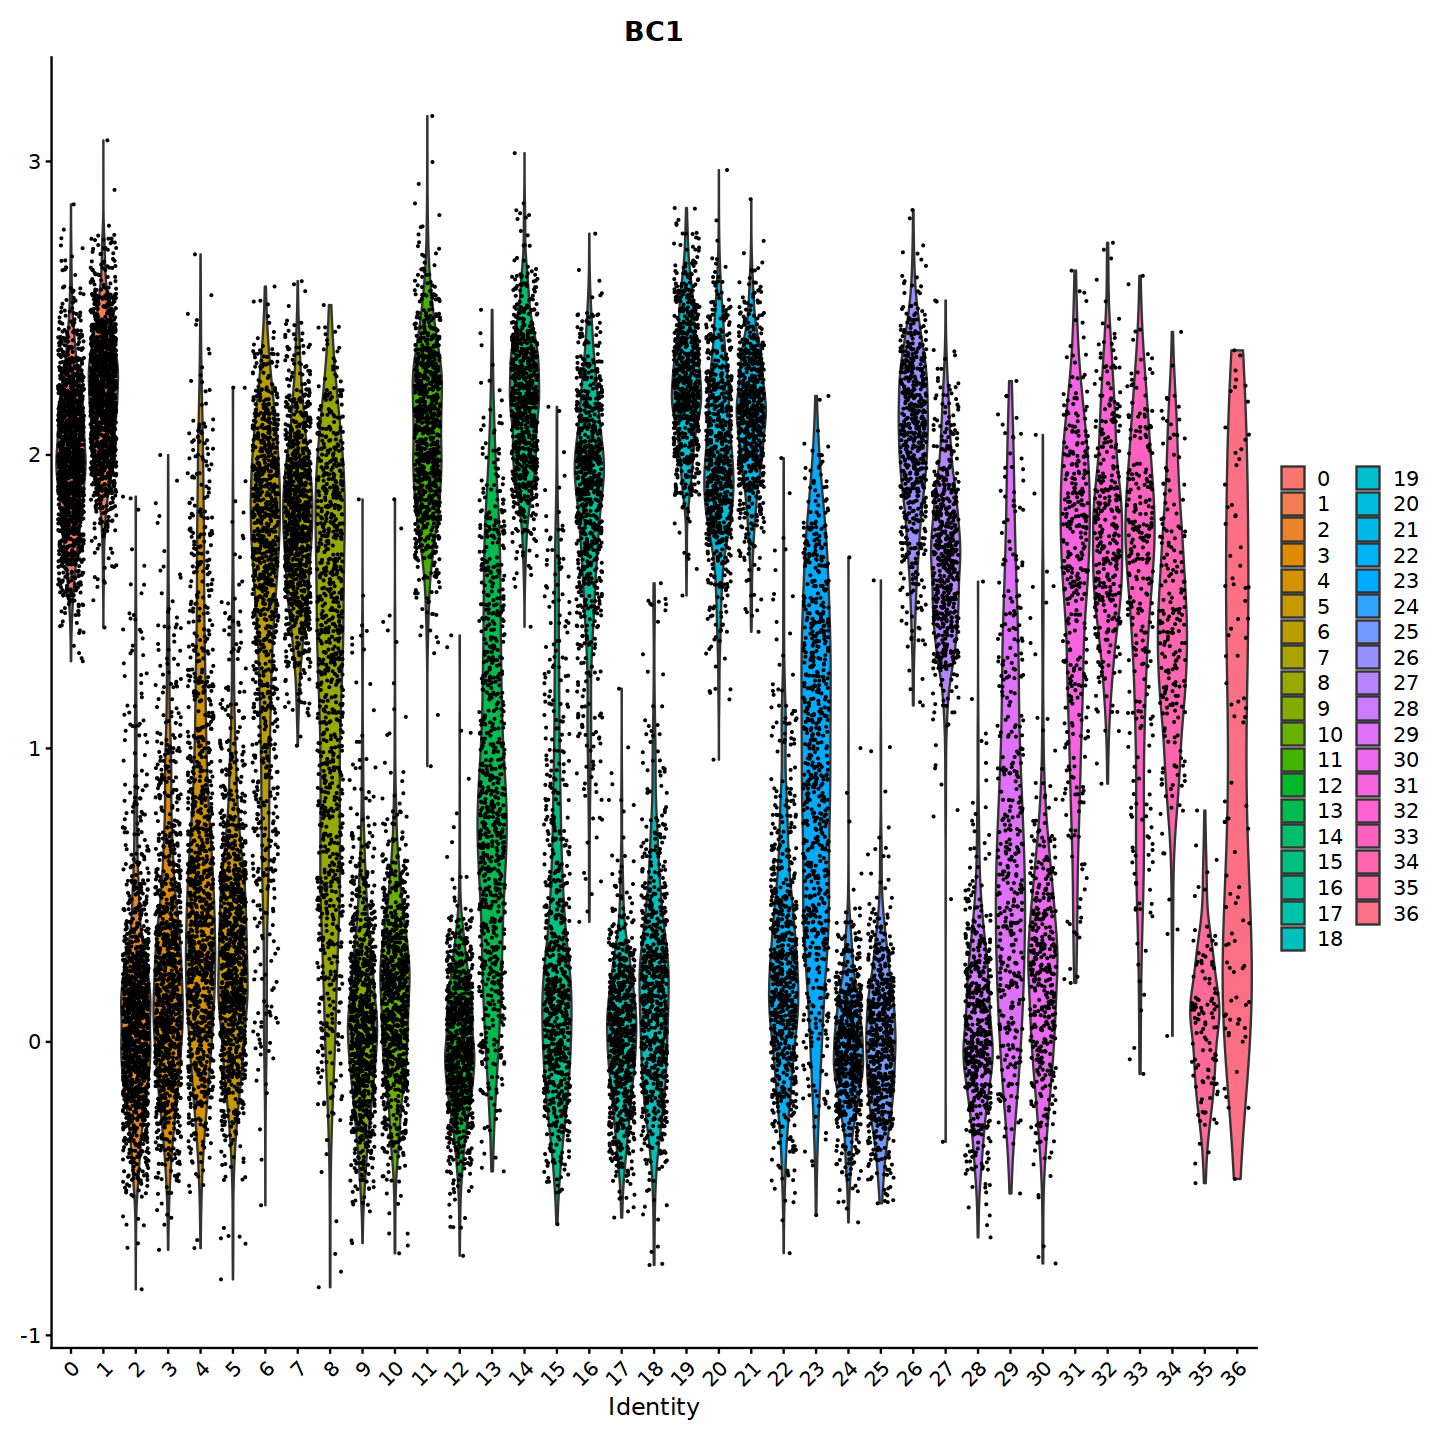

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
VlnPlot(scRNA.integrated,features = 'GC1')
VlnPlot(scRNA.integrated,features = 'SC1')
VlnPlot(scRNA.integrated,features = 'BC1')

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
p1=FeaturePlot(scRNA.integrated,features = 'GC1',min.cutoff = 0,cols = c('#FFFFCC','blue'))+theme(legend.position = 'right',legend.text=element_blank(),legend.key.height=unit(3,"line"),axis.title = element_blank(),
      axis.text = element_blank()
    )
ggsave(filename = "feature.celltype.1.png",p1,device = "png",width = 13.5,height = 15,units = "cm")
p2=FeaturePlot(scRNA.integrated,features = 'SC1',min.cutoff = 0,cols = c('#FFFFCC','blue'))+theme(legend.position = 'right',legend.text=element_blank(),legend.key.height=unit(3,"line"),axis.title = element_blank(),
      axis.text = element_blank()
    )
ggsave(filename = "feature.celltype.2.png",p2,device = "png",width = 13.5,height = 15,units = "cm")
p3=FeaturePlot(scRNA.integrated,features = 'BC1',min.cutoff = 0,cols = c('#FFFFCC','blue'))+theme(legend.position = 'right',legend.text=element_blank(),legend.key.height=unit(3,"line"),axis.title = element_blank(),
      axis.text = element_blank()
    )
ggsave(filename = "feature.celltype.3.png",p3,device = "png",width = 13.5,height = 15,units = "cm")

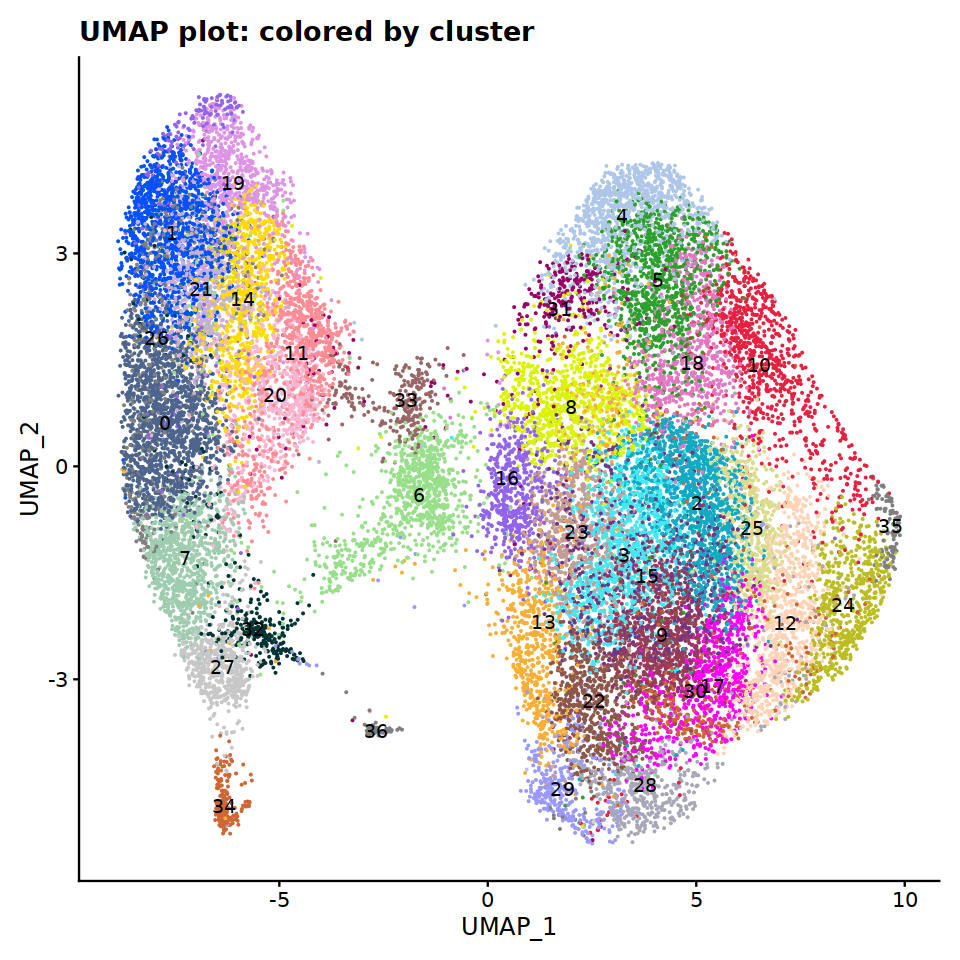

In [14]:
options(repr.plot.width=8, repr.plot.height=8)

DimPlot(scRNA.integrated, reduction = "umap", label = TRUE, repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")


In [15]:
library(stringr)
ident_id = scRNA.temp[["celltype"]]
newid=str_split_fixed(ident_id[,1],':',n=2)[,2]
scRNA.temp <- AddMetaData(object = scRNA.temp, metadata = newid, col.name = "celltype2") 
Idents(scRNA.temp)=scRNA.temp$celltype2

Warning message:
“package ‘stringr’ was built under R version 4.1.3”


In [16]:
table(scRNA.temp$celltype)
table(scRNA.temp$celltype2)


    0:BC     1:BC     2:SC     3:SC     4:SC     5:SC  6:SC_BC     7:BC 
    1527     1376     1349     1132     1120     1075      993      978 
 8:SC_BC     9:SC    10:SC    11:BC 12:GC_SC 13:SC_BC    14:BC    15:SC 
     904      902      882      879      843      798      759      751 
16:SC_BC    17:SC    18:SC    19:BC    20:BC    21:BC    22:SC 23:SC_BC 
     742      739      723      723      719      705      703      691 
24:GC_SC    25:SC    26:BC    27:BC    28:SC 29:SC_BC    30:SC 31:SC_BC 
     611      592      576      565      507      381      370      331 
   32:BC 33:SC_BC    34:BC 35:GC_SC 36:SC_BC 
     309      272      202      111       93 


   BC GC_SC    SC SC_BC 
 9318  1565 10845  5205 

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


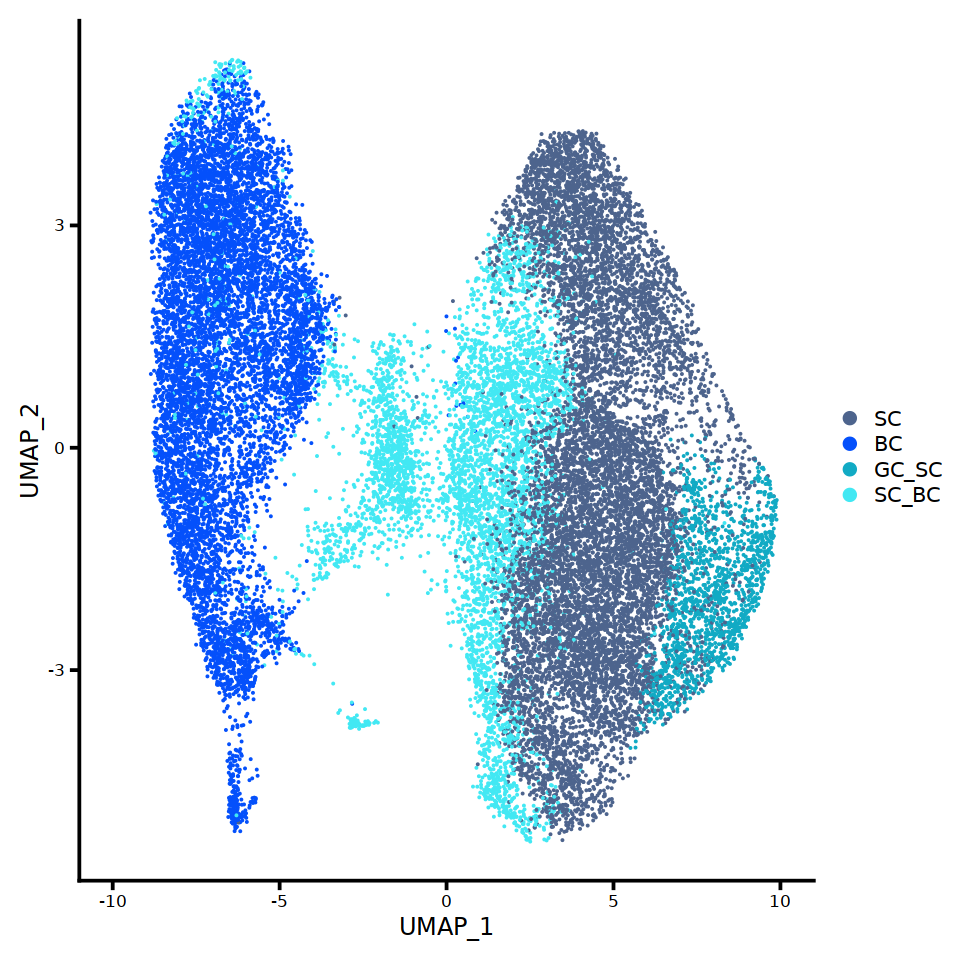

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(scRNA.temp, reduction = "umap", label = F, cols=colors[1:length(unique(scRNA.temp@active.ident))])+xlim(-10,10)+
        theme(panel.background = element_blank(),axis.line.x = element_line(color="black",size=0.8),axis.line.y = element_line(color="black",size=0.8),
        axis.text.x = element_text(size=10),axis.text.y = element_text(size=10),axis.line = element_line(colour = "black"),
             axis.ticks.x=element_line(color="black",size=0.8),
      axis.ticks.y=element_line(color="black",size=0.8),axis.ticks.length.x = unit(0.2,'cm'), 
      axis.ticks.length.y = unit(0.2,'cm'))
#DimPlot(scRNA.temp, reduction = "umap", label = F,group.by ='seurat_clusters' , cols=colors[1:length(unique(scRNA.integrated@active.ident))])
ggsave(filename = "Figure1B_cell_type.png",device = "png",width = 12,height = 10,units = "cm")

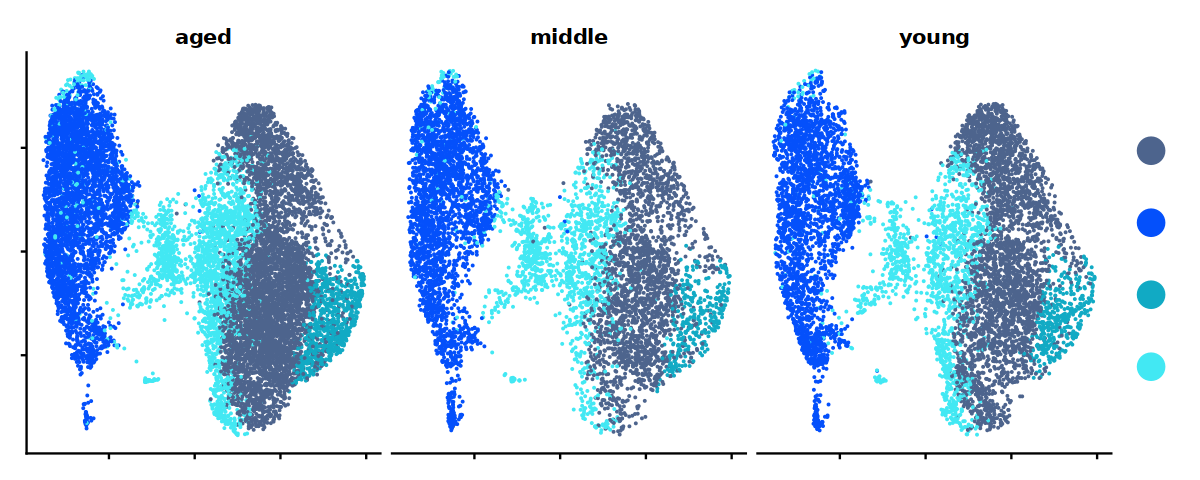

In [17]:
options(repr.plot.width=10, repr.plot.height=4)
DimPlot(object = scRNA.temp, reduction = "umap", label = F, repel = F, split.by = "group", 
        cols=colors[1:length(unique(scRNA.temp@active.ident))])+
theme(legend.position = 'right',legend.text=element_blank(),legend.key.height=unit(3,"line"),axis.title = element_blank(),
      axis.text = element_blank()
    )+guides(colour = guide_legend(override.aes = list(size=7)))
ggsave(filename = "cell_type_bygroup.png",device = "png",width = 40,height = 15,units = "cm")

In [18]:
table(Idents(scRNA.temp))


   SC    BC GC_SC SC_BC 
10845  9318  1565  5205 

# 大类基因

In [1]:
tt=list(
    c('DSC1','KRT2','IVL','TGM3','FLG'), # GC   granular cell
    c('KRT10','KRT1','DSG1','CDH1'),      # SC  spinous cell   also expressed in GC
    c('KRT14','KRT5','CDH3','TP63')   #BC     basal cell   
    )    
names(tt)=c('GC',"SC",'BC')

In [3]:
library(Seurat)
library(ggplot2)
scRNA.temp=readRDS('scRNA_annodata.KC.rds')
head(scRNA.temp,2)

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject



orig.ident nCount_RNA nFeature_RNA sample   
Skin-Y-18_AAACCTGCACAGTCGC-18 Skin-Y-18  10128      3125         Skin-Y-18
Skin-Y-18_AAACCTGGTCTCAACA-18 Skin-Y-18   4145      1426         Skin-Y-18
                              group group2 percent.mito integrated_snn_res.1.8
Skin-Y-18_AAACCTGCACAGTCGC-18 young 18     0.07099131   0                     
Skin-Y-18_AAACCTGGTCTCAACA-18 young 18     0.14282268   9                     
                              seurat_clusters integrated_snn_res.1.6
Skin-Y-18_AAACCTGCACAGTCGC-18 2               2                     
Skin-Y-18_AAACCTGGTCTCAACA-18 4               14                    
                              integrated_snn_res.1.5 integrated_snn_res.1.9
Skin-Y-18_AAACCTGCACAGTCGC-18 0                      3                     
Skin-Y-18_AAACCTGGTCTCAACA-18 11                     10                    
                              celltype celltype2 celltype3 RNA_snn_res.2.8
Skin-Y-18_AAACCTGCACAGTCGC-18 2:SC     SC        KC        2              
Skin-Y-18_AAACCTGGTCTCAACA-18 4:SC     SC        KC        4              
                              GC1         SC1      BC1       
Skin-Y-18_AAACCTGCACAGTCGC-18 -0.04911731 2.192695 -0.4098248
Skin-Y-18_AAACCTGGTCTCAACA-18 -0.24075157 1.622463  0.6968192

Warning message:
“Scaling data with a low number of groups may produce misleading results”


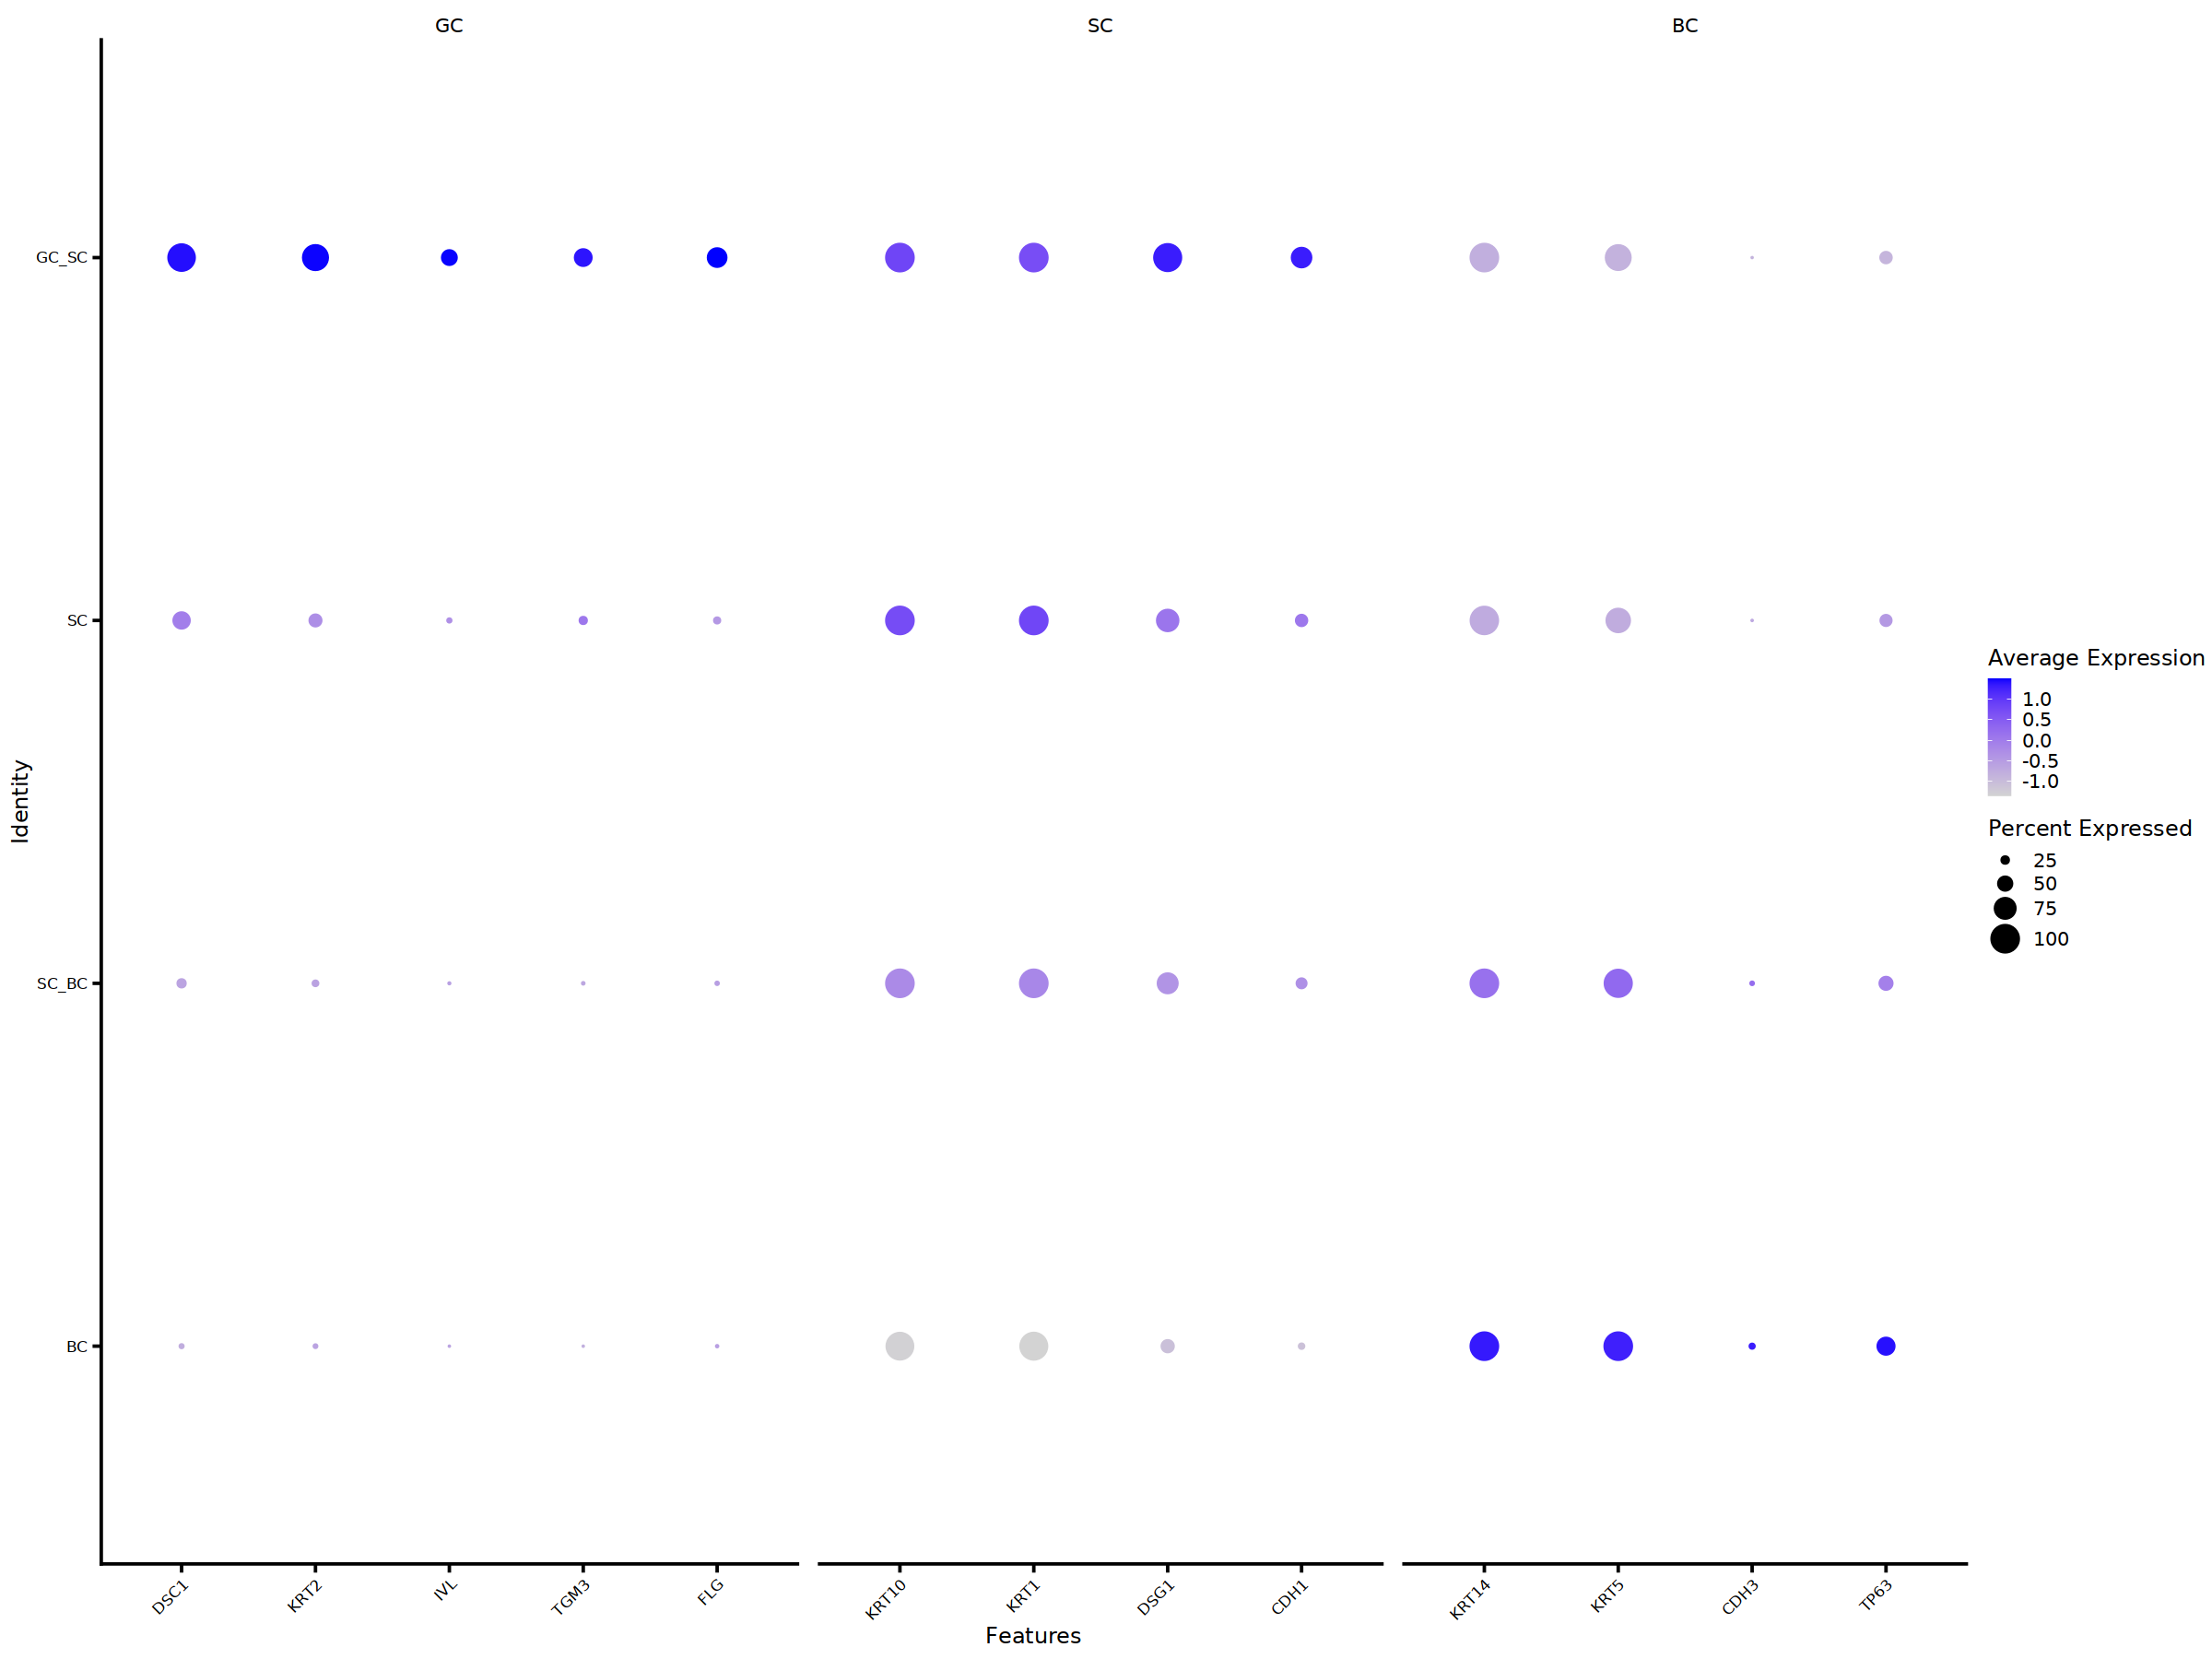

In [9]:
options(repr.plot.width=20, repr.plot.height=15)
DefaultAssay(scRNA.temp)='RNA'
levels(scRNA.temp)=c("BC",'SC_BC','SC','GC_SC') #########################按特定顺序排列
DotPlot(scRNA.temp, features = tt,dot.scale = 8,#col.min = 0,
       )+RotatedAxis()+theme(panel.background = element_blank(),axis.line.x = element_line(color="black",size=0.8),axis.line.y = element_line(color="black",size=0.8),
        axis.text.x = element_text(size=10),axis.text.y = element_text(size=10),axis.line = element_line(colour = "black"),
             axis.ticks.x=element_line(color="black",size=0.8),
      axis.ticks.y=element_line(color="black",size=0.8),axis.ticks.length.x = unit(0.2,'cm'), 
      axis.ticks.length.y = unit(0.2,'cm'))
ggsave(filename = "marker.total.png",device = "png",width =20,height = 15,units = "cm")

In [ ]:
saveRDS(scRNA.temp, file = "scRNA_annodata.KC.rds")